<h1>Problem:</h1>

Suppose you are the CEO of a Food Trucks franchise. You are considering different cities to open a new point of sale. The chain already has trucks in different cities and you have data for the city's profits and populations.
You want to use this data to help you choose the city to open a new point of sale.

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [406]:
dataset = pd.read_csv('univariate_linear_regression_dataset.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, -1].values

In [407]:
dataset

,pop,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


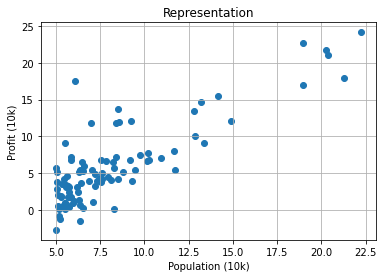

In [408]:
axes = plt.axes()
axes.grid()
plt.title("Representation")
plt.scatter(X, y)
plt.xlabel("Population (10k)")
plt.ylabel("Profit (10k)")
plt.show()

# Linear Regression Model

<h2>Scipy Regression</h2>

In [409]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [410]:
def predict(X):
  return slope * X + intercept

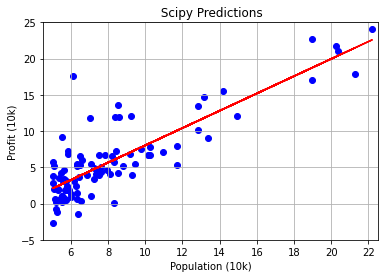

In [411]:
axes = plt.axes()
axes.grid()
plt.title(" Scipy Predictions")
plt.plot(X, predict(X), c='r')
plt.scatter(X, y, c='b')
plt.xlabel('Population (10k)')
plt.ylabel('Profit (10k)')
plt.xlim((4.5, 22.5))
plt.ylim((-5, 25))
plt.show()

<h2>Scikit Learn - Regression</h2>

In [412]:
from sklearn.model_selection import train_test_split
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [413]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [414]:
y_pred = regressor.predict(X_test)

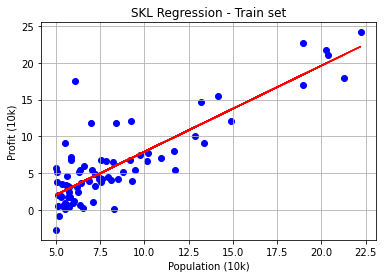

In [415]:
axes = plt.axes()
axes.grid()
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title("SKL Regression - Train set")
plt.xlabel("Population (10k)")
plt.ylabel('Profit (10k)')
plt.show()

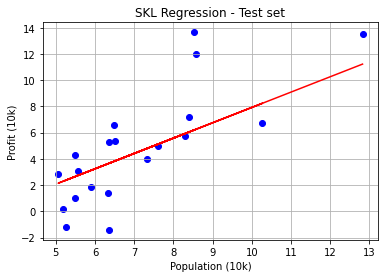

In [416]:
axes = plt.axes()
axes.grid()
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("SKL Regression - Test set")
plt.xlabel("Population (10k)")
plt.ylabel('Profit (10k)')
plt.show()

<h2>Compare Scipy and SKLearn</h2>

<h3>Plots</h3>

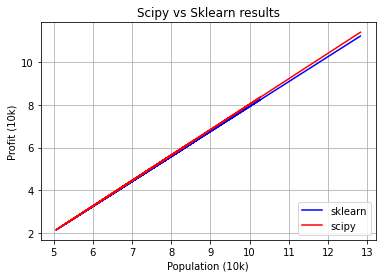

In [417]:
axes = plt.axes()
axes.grid()
plt.title('Scipy vs Sklearn results')
plt.plot(X_test, y_pred, c='b', label="sklearn")
plt.plot(X_test, predict(X_test), c='r', label="scipy")
plt.xlabel("Population (10k)")
plt.ylabel('Profit (10k)')
plt.legend(loc="lower right")
plt.show()

<h3>R2 Scores</h3>

In [418]:
from sklearn.metrics import r2_score
print("Scipy: "+str(r_value))
print("SKLearn: "+str(r2_score(y_train, regressor.predict(X_train))))

Scipy: 0.8378732325263409
SKLearn: 0.7221737943890659


<h3>Random Predictions</h3>

In [419]:
angers = np.array([15])
angers = angers.reshape(angers.shape[0], 1)
print("150K (Angers)")
print("Scipy: ["+str(predict(15))+"]")
print("SkLearn: "+str(regressor.predict(angers).reshape(1,)))
print("Delta = "+str(np.abs(predict(15)-regressor.predict(angers).reshape(1,))))

150K (Angers)
Scipy: [13.999723784532057]
SkLearn: [13.772103]
Delta = [0.22762078]


In [420]:
rennes = np.array([21])
rennes = rennes.reshape(rennes.shape[0], 1)
print("215K (Rennes)")
print("Scipy: ["+str(predict(21))+"]")
print("SkLearn: "+str(regressor.predict(rennes).reshape(1,)))
print("Delta = "+str(np.abs(predict(21)-regressor.predict(rennes).reshape(1,))))

215K (Rennes)
Scipy: [21.15792564966962]
SkLearn: [20.79185634]
Delta = [0.36606931]


# Support Vector Machine Model

In [421]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [422]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h2>Observations</h2>

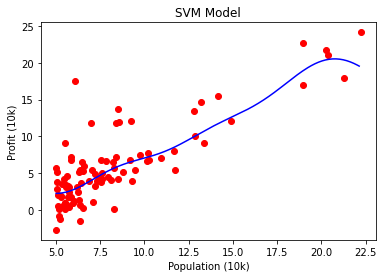

In [423]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('SVM Model')
plt.xlabel('Population (10k)')
plt.ylabel('Profit (10k)')
plt.show()

<h2>Random Predictions</h2>

In [424]:
print('150K (Angers)')
print("Predict: "+str(sc_y.inverse_transform(regressor.predict(sc_X.transform([[15]])))))

150K (Angers)
Predict: [12.70672805]


In [425]:
print('215K (Rennes)')
print("Predict: "+str(sc_y.inverse_transform(regressor.predict(sc_X.transform([[21]])))))

215K (Rennes)
Predict: [20.49885932]
